### Os dados utilizados neste trabalho foram fornecidos por [Sajid - dbdmobile](https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset)
#### Rótulos de Conteúdo (Traduzidos do Inglês):

- `anime_id`: Identificação única para cada anime.

- `Name`: O nome do anime em seu idioma original.

- `English name`: O nome em inglês do anime.

- `Other name`: Nome nativo ou título do anime (pode estar em japonês, chinês ou coreano).

- `Score`: A pontuação ou classificação atribuída ao anime.

- `Genres`: Os gêneros do anime, separados por vírgulas.

- `Synopsis`: Uma breve descrição ou resumo do enredo do anime.

- `Type`: O tipo de anime (por exemplo, série de TV, filme, OVA, etc.).

- `Episodes`: O número de episódios no anime.

- `Aired`: As datas em que o anime foi ao ar.

- `Premiered`: A temporada e o ano em que o anime estreou.

- `Status`: O status do anime (por exemplo, Finalizado, Atualmente em exibição, etc.).

- `Producers`: As empresas de produção ou produtores do anime.

- `Licensors`: Os licenciadores do anime (por exemplo, plataformas de streaming).

- `Studios`: Os estúdios de animação que trabalharam no anime.

- `Source`: O material de origem do anime (por exemplo, mangá, light novel, original).

- `Duration`: A duração de cada episódio.

- `Rating`: A classificação etária do anime.

- `Rank`: A posição do anime com base em popularidade ou outros critérios.

- `Popularity`: A classificação de popularidade do anime.

- `Favorites`: O número de vezes que o anime foi marcado como favorito pelos usuários.

- `Scored By`: O número de usuários que deram uma pontuação ao anime.

- `Members`: O número de membros que adicionaram o anime à sua lista na plataforma.

- `Image URL`: A URL da imagem ou poster do anime.


### Importando as bibliotecas e fazendo as configurações

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')
%matplotlib inline

### Extraindo os Dados e fazendo a análise inicial

In [100]:
path = "../data/anime-dataset-2023.csv"
df = pd.read_csv(path)
df.sample(3)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
23784,54038,Ikiru Kabe,The Living Wall,生きる壁,UNKNOWN,Avant Garde,"The ""living wall"" reshapes itself into various...",Movie,1.0,"Dec 31, 2020",...,UNKNOWN,Original,5 min,G - All Ages,16719.0,21574,0,UNKNOWN,70,https://cdn.myanimelist.net/images/anime/1781/...
22640,52066,Recola,UNKNOWN,リコラ,UNKNOWN,Slice of Life,A stop-motion series about Recola who creative...,TV,UNKNOWN,"Sep 28, 2020 to ?",...,UNKNOWN,Original,5 min,G - All Ages,19157.0,19527,0,UNKNOWN,162,https://cdn.myanimelist.net/images/anime/1564/...
5850,9706,Canaan: Minorikawa Report 201X Shanghai,Canaan: Minorikawa Report Year 201X Shanghai,カナン 御法川レポート 201X 上海,6.46,Action,Special included in BD vol. 5.,Special,1.0,"Feb 26, 2010",...,P.A. Works,Visual novel,12 min,R - 17+ (violence & profanity),6577.0,6541,2,2203.0,8219,https://cdn.myanimelist.net/images/anime/8/269...


In [101]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

In [102]:
df.describe()

,anime_id,Popularity,Favorites,Members
count,24905.000000,24905.000000,24905.000000,2.490500e+04
mean,29776.709014,12265.388356,432.595222,3.710496e+04
std,17976.076290,7187.428393,4353.181647,1.568252e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,10507.000000,6040.000000,0.000000,2.090000e+02
50%,34628.000000,12265.000000,1.000000,1.056000e+03
75%,45240.000000,18491.000000,18.000000,9.326000e+03
max,55735.000000,24723.000000,217606.000000,3.744541e+06


In [103]:
df.isnull().count()

anime_id        24905
Name            24905
English name    24905
Other name      24905
Score           24905
Genres          24905
Synopsis        24905
Type            24905
Episodes        24905
Aired           24905
Premiered       24905
Status          24905
Producers       24905
Licensors       24905
Studios         24905
Source          24905
Duration        24905
Rating          24905
Rank            24905
Popularity      24905
Favorites       24905
Scored By       24905
Members         24905
Image URL       24905
dtype: int64

#### Excluindo as features que não agregam para análise

In [104]:
col_drop = ['Image URL', 'Members', 'Duration', 'Source', 'Licensors', 'Producers', 'Status', 'Premiered', 'Synopsis', 'Other name', 'English name', 'Aired'] 
df = df.drop(columns=col_drop)
df

,anime_id,Name,Score,Genres,Type,Episodes,Studios,Rating,Rank,Popularity,Favorites,Scored By
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,Sunrise,R - 17+ (violence & profanity),41.0,43,78525,914193.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",Movie,1.0,Bones,R - 17+ (violence & profanity),189.0,602,1448,206248.0
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",TV,26.0,Madhouse,PG-13 - Teens 13 or older,328.0,246,15035,356739.0
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,Sunrise,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,Toei Animation,PG - Children,4240.0,5126,14,6413.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24900,55731,Wu Nao Monu,UNKNOWN,"Comedy, Fantasy, Slice of Life",ONA,15.0,UNKNOWN,PG-13 - Teens 13 or older,UNKNOWN,24723,0,UNKNOWN
24901,55732,Bu Xing Si: Yuan Qi,UNKNOWN,"Action, Adventure, Fantasy",ONA,18.0,UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN
24902,55733,Di Yi Xulie,UNKNOWN,"Action, Adventure, Fantasy, Sci-Fi",ONA,16.0,UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN
24903,55734,Bokura no Saishuu Sensou,UNKNOWN,UNKNOWN,Music,1.0,UNKNOWN,PG-13 - Teens 13 or older,0.0,0,0,UNKNOWN


#### Analisando as features

##### Genre

In [113]:
# Inicialize um dicionário para armazenar a contagem de cada gênero
genero_contagem = {}

# Iterar sobre cada linha da coluna 'Genres'
for generos in df['Genres']:
    # Dividir a string de gêneros em uma lista separada por vírgulas
    generos_lista = generos.split(',')
    # Iterar sobre cada gênero na lista
    for genero in generos_lista:
        # Remover espaços em branco extras e converter para minúsculas
        genero = genero.strip().lower()
        genero_contagem[genero] = genero_contagem.get(genero, 0) + 1

# Deixa os dados ordenados em ordem Decrescente
sorted_genres = sorted(genero_contagem.items(), key=lambda x: x[1], reverse=True)

# Imprime todos os gêneros e seu aparecimento
for i, (genero, contagem) in enumerate(sorted_genres, start=1):
    print(f'{i} - {genero}: {contagem}')


1 - comedy: 7142
2 - fantasy: 5306
3 - unknown: 4929
4 - action: 4730
5 - adventure: 3842
6 - sci-fi: 3091
7 - drama: 2836
8 - romance: 2063
9 - slice of life: 1755
10 - supernatural: 1494
11 - hentai: 1486
12 - mystery: 847
13 - avant garde: 804
14 - ecchi: 795
15 - sports: 771
16 - horror: 534
17 - suspense: 242
18 - award winning: 241
19 - boys love: 169
20 - gourmet: 146
21 - girls love: 113
22 - erotica: 54


Temos muitas entradas unknown (desconhecidas), mas por ser uma váriavel do tipo nominal, acredito que não vai nos atrapalhar e possívelmente podemos remover esses dados

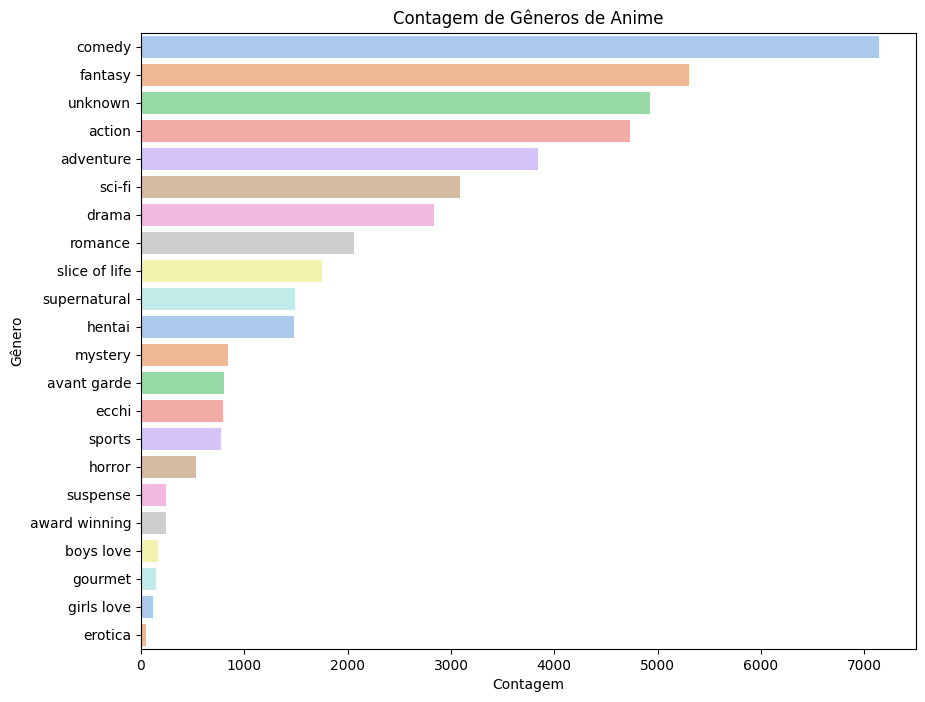

In [142]:
df_genres = pd.DataFrame(sorted_genres, columns=['Genero', 'Contagem'])

cores = sns.color_palette("pastel", len(df_genres))

plt.figure(figsize=(10, 8))
sns.barplot(x='Contagem', y='Genero', data=df_genres, palette=cores)
plt.title('Contagem de Gêneros de Anime')
plt.xlabel('Contagem')
plt.ylabel('Gênero')
plt.show()

##### Score